## Functional annotation of TotalRNA against CAZy

This notebook is part of the analysis of the TotalRNA   mRNA genes from Trinity. It was run by Curro 8/17/2023.

First, check dependencies. Safe to ignore. If any error, you can create a new conda enviroment with:

```bash
mamba create -n diamond_jupyter jupyterlab diamond pandas python=3 -c conda-forge  -c bioconda
```

In [52]:
%%bash
diamond --version
python -c "import pandas; print(pandas.__version__)"
python -c "import matplotlib; print(matplotlib.__version__)"
bash --version | head -n 1

diamond version 2.1.6
1.5.2
3.7.1
GNU bash, version 4.4.20(1)-release (x86_64-pc-linux-gnu)


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

The input is the fasta file of the TotalRNA mRNA genes from Trinity and the count table. 

In [54]:
trinity_file = "../ncRNA_filtered_Trinity.fasta"
count_table = "../mRNA_soil_AbundanceFiltered.tsv"
## Sanity check: trinity and count table exit
assert os.path.exists(trinity_file), "Trinity file does not exist"
assert os.path.exists(count_table), "Count table does not exist"

## Run Diamond 

In [55]:
database = "/Databases/CAZy/CAZyDB.07312019.dmnd"
descriptions_tsv = "/Databases/CAZy/CAZyDB.07302020.fam-activities.tsv"
outfile_matches = "CAZy_matches_diamond.tsv"

Now, we run diamond (using 50 threads and ultra sensitive mode)

In [56]:
%%bash -s "$database" "$trinity_file" "$outfile_matches"
if [ ! -f $3 ]; then
diamond blastx -p 50 --ultra-sensitive -d $1 -q $2 -o $3 2> /dev/null
fi
head $3

TRINITY_DN608333_c0_g1_i1	AXG12648.1|GH23|	43.1	72	41	0	5	220	208	279	4.68e-10	58.5
TRINITY_DN608333_c0_g1_i1	ADU47436.1|GH23|	43.1	72	41	0	5	220	219	290	4.71e-10	58.5
TRINITY_DN608333_c0_g1_i1	APH03183.1|GH23|	44.4	72	40	0	8	223	193	264	5.16e-08	52.8
TRINITY_DN608333_c0_g1_i1	ANH38304.1|GH23|	36.0	75	48	0	2	226	219	293	9.63e-08	52.0
TRINITY_DN608333_c0_g1_i1	AEE47186.1|GH23|	37.2	78	49	0	14	247	271	348	6.37e-07	49.7
TRINITY_DN608333_c0_g1_i1	VEH35523.1|GH23|	37.2	78	49	0	14	247	271	348	6.37e-07	49.7
TRINITY_DN608333_c0_g1_i1	SDP39218.1|GH23|	40.8	71	42	0	8	220	219	289	1.61e-06	48.5
TRINITY_DN608333_c0_g1_i1	BAK37524.1|GH23|	39.5	76	46	0	14	241	210	285	4.09e-06	47.4
TRINITY_DN608333_c0_g1_i1	AUI51762.1|GH23|	36.5	74	47	0	2	223	213	286	4.11e-06	47.4
TRINITY_DN608333_c0_g1_i1	QBF47832.1|GH23|	38.0	71	44	0	8	220	183	253	1.05e-05	46.2


## Parse Diamond output and preprocess

In [57]:
diamond = pd.read_csv(
    outfile_matches,
    delimiter="\t",
    comment="#",
    header=None,
    names=[
        "Query id",
        "Subject id",
        "% identity",
        "alignment length",
        "mismatches",
        "gap openings",
        "q. start",
        "q. end",
        "s. start",
        "s. end",
        "e-value",
        "score",
    ],
)

Now, we have a table with all the alignments between our "genes" and the database.

In [58]:
diamond

,Query id,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
0,TRINITY_DN608333_c0_g1_i1,AXG12648.1|GH23|,43.1,72,41,0,5,220,208,279,4.680000e-10,58.5
1,TRINITY_DN608333_c0_g1_i1,ADU47436.1|GH23|,43.1,72,41,0,5,220,219,290,4.710000e-10,58.5
2,TRINITY_DN608333_c0_g1_i1,APH03183.1|GH23|,44.4,72,40,0,8,223,193,264,5.160000e-08,52.8
3,TRINITY_DN608333_c0_g1_i1,ANH38304.1|GH23|,36.0,75,48,0,2,226,219,293,9.630000e-08,52.0
4,TRINITY_DN608333_c0_g1_i1,AEE47186.1|GH23|,37.2,78,49,0,14,247,271,348,6.370000e-07,49.7
...,...,...,...,...,...,...,...,...,...,...,...,...
748549,TRINITY_DN17263_c0_g1_i4,ATY83962.1|CBM50|,50.0,120,58,2,399,752,358,477,7.370000e-31,124.0
748550,TRINITY_DN17263_c0_g1_i4,AGA70845.1|CBM50|,44.1,118,65,1,399,752,116,232,8.550000e-31,119.0
748551,TRINITY_DN245_c1_g1_i1,ACA16745.1|GT4|,38.2,76,40,2,302,96,326,401,2.140000e-04,44.7
748552,TRINITY_DN249_c4_g1_i3,AAB84377.1|GT8|2.4.1.186,71.0,31,9,0,185,93,3,33,6.550000e-04,41.2


## Read count table
However, we also need to read the count table:

In [59]:
%%bash -s "$count_table"
head $1

ContigID	t1.2	t1.3	X1	t2.26	t2.30	X6	t4.38	t2.25	X4	t2.27	t4.39	t4.41	t4.40	t4.37	X3	t1.6	X2	t4.42	t2.28	t1.4	t1.1	t1.5	X5	t2.29
TRINITY_DN3994_c0_g1_i1	0	0	7	0	0	7	0	0	9	0	0	2	0	0	8	0	4	0	0	0	0	0	9	0
TRINITY_DN270143_c0_g1_i1	3	5	0	4	0	3	4	0	11	0	3	1	4	0	4	0	4	0	0	0	10	0	7	0
TRINITY_DN118327_c0_g1_i9	1	0	6	2	2	0	6	4	0	0	0	3	0	0	7	5	8	0	0	5	1	2	2	0
TRINITY_DN11451_c1_g1_i14	0	1	11	0	1	9	0	0	1	0	0	0	1	0	6	5	8	0	3	13	1	4	11	1
TRINITY_DN13783_c0_g1_i8	0	4	3	1	4	7	2	5	10	7	2	8	0	1	1	0	3	0	0	0	0	2	3	9
TRINITY_DN2601_c0_g2_i4	2	211	134	4	1	8	62	51	11	107	33	1	3	2	20	2	46	0	1	0	110	0	44	0
TRINITY_DN398839_c0_g1_i1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	26	0	0	0	64	0	2	0	0
TRINITY_DN13475_c0_g1_i5	0	1	3	7	2	10	4	6	9	0	0	0	3	0	7	0	1	0	0	0	0	0	15	0
TRINITY_DN10352_c0_g3_i1	0	5	4	7	0	10	6	4	4	0	3	0	0	5	2	0	5	0	0	0	6	0	3	0


In [60]:
counts = pd.read_csv(count_table, sep="\t", comment="#").set_index("ContigID")
counts

,t1.2,t1.3,X1,t2.26,t2.30,X6,t4.38,t2.25,X4,t2.27,...,X3,t1.6,X2,t4.42,t2.28,t1.4,t1.1,t1.5,X5,t2.29
ContigID,,,,,,,,,,,,,,,,,,,,,
TRINITY_DN3994_c0_g1_i1,0,0,7,0,0,7,0,0,9,0,...,8,0,4,0,0,0,0,0,9,0
TRINITY_DN270143_c0_g1_i1,3,5,0,4,0,3,4,0,11,0,...,4,0,4,0,0,0,10,0,7,0
TRINITY_DN118327_c0_g1_i9,1,0,6,2,2,0,6,4,0,0,...,7,5,8,0,0,5,1,2,2,0
TRINITY_DN11451_c1_g1_i14,0,1,11,0,1,9,0,0,1,0,...,6,5,8,0,3,13,1,4,11,1
TRINITY_DN13783_c0_g1_i8,0,4,3,1,4,7,2,5,10,7,...,1,0,3,0,0,0,0,2,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRINITY_DN3655_c0_g1_i21,10,3,15,21,10,10,10,26,8,36,...,4,12,8,18,23,18,4,16,18,14
TRINITY_DN4235_c0_g1_i20,2,3,5,3,0,10,6,1,23,5,...,6,0,4,0,0,0,10,1,6,2
TRINITY_DN58984_c0_g1_i2,1,10,10,0,0,0,2,1,0,1,...,0,0,0,0,0,0,14,0,1,0


## Preprocessing
### Most significant hit per Contig

Now, we need to get the most significant hit per each contig ID. Let's inspect how many hits there are per contig (adjust the number of bins). 

Text(0.5, 1.0, 'Number of hits per contig')

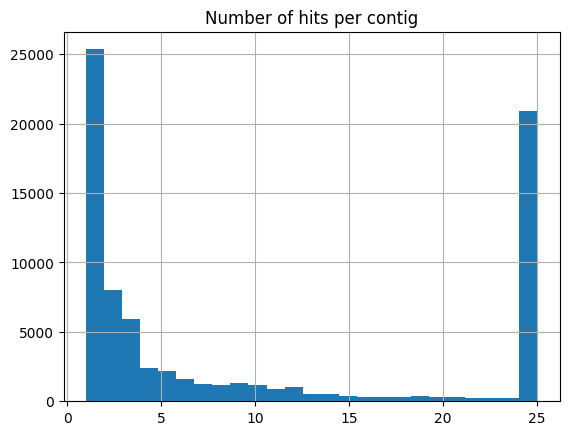

In [61]:
diamond.pivot_table(columns=["Query id"], aggfunc="size").hist(bins=25)
plt.title("Number of hits per contig")

In this case, we are going to sort rows per e-value and score and get the most significant hit per each ContigId.

In [62]:
diamond = (
    diamond.sort_values(by=["e-value", "score"], ascending=[True, False])
    .drop_duplicates("Query id", keep="first")
    .set_index("Query id")
)
diamond

,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
Query id,,,,,,,,,,,
TRINITY_DN168237_c0_g1_i2,ALD70219.1|GH85|,99.4,804,5,0,346,2757,1,804,0.000000,1634.0
TRINITY_DN23758_c0_g1_i3,AFY17523.1|GT2|,98.3,756,13,0,2,2269,99,854,0.000000,1519.0
TRINITY_DN23758_c0_g1_i5,BAV30135.1|GT2|,97.5,729,18,0,2,2188,126,854,0.000000,1448.0
TRINITY_DN8665_c0_g1_i9,AFY17497.1|GT35|,96.7,701,23,0,107,2209,1,701,0.000000,1359.0
TRINITY_DN8665_c0_g1_i5,AFY17497.1|GT35|,96.6,701,24,0,107,2209,1,701,0.000000,1357.0
...,...,...,...,...,...,...,...,...,...,...,...
TRINITY_DN957034_c0_g1_i1,ATG16813.1|GH23|,27.0,63,45,1,11,196,53,115,0.000998,40.0
TRINITY_DN23447_c1_g1_i1,APF20287.1|GH5_7|,25.4,177,107,4,222,728,2428,2587,0.000999,45.8
TRINITY_DN619652_c0_g1_i1,ASK36628.1|GT4|,44.2,52,23,2,49,204,108,153,0.000999,40.0


### Inspect E-values from aligned orthologous genes before filtering by e-value

array([[<Axes: title={'center': 'e-value'}>]], dtype=object)

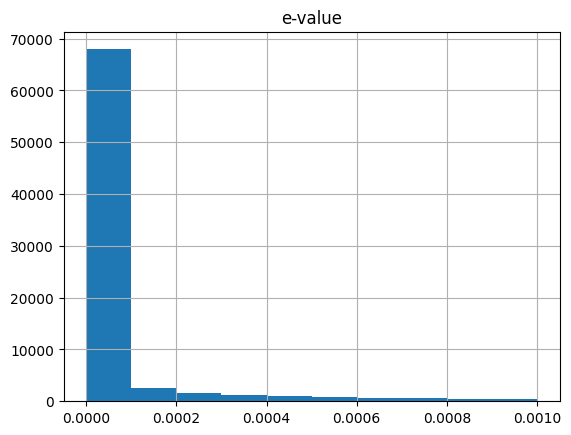

In [63]:
diamond.hist("e-value")

### Inspect E-values from aligned orthologous genes after filtering by e-value

We need to set a threshold:

In [64]:
evalue_threshold = 0.0001

In [65]:
diamond = diamond.loc[diamond["e-value"] < evalue_threshold]

array([[<Axes: title={'center': 'e-value'}>]], dtype=object)

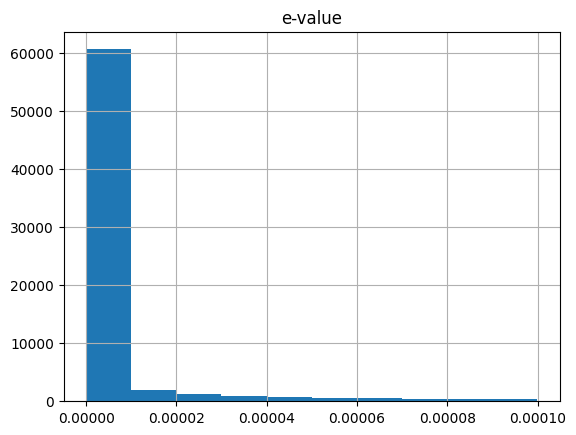

In [66]:
diamond.hist("e-value")

In [67]:
val = len(set(diamond["Subject id"]))
print(f"There are {val} unique orthologous genes")

There are 14864 unique orthologous genes


### Inspect % identity and aligment length

array([[<Axes: title={'center': 'alignment length'}>]], dtype=object)

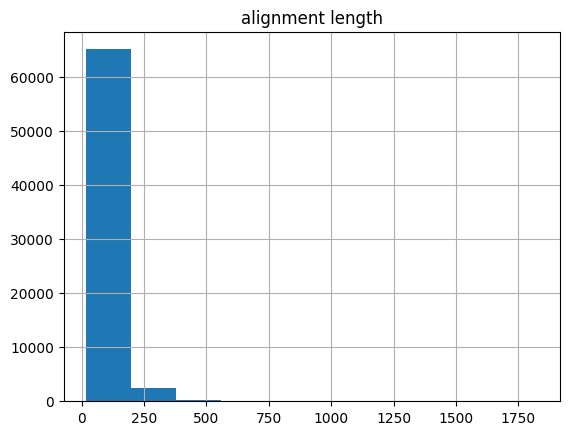

In [68]:
diamond.hist("alignment length")

array([[<Axes: title={'center': '% identity'}>]], dtype=object)

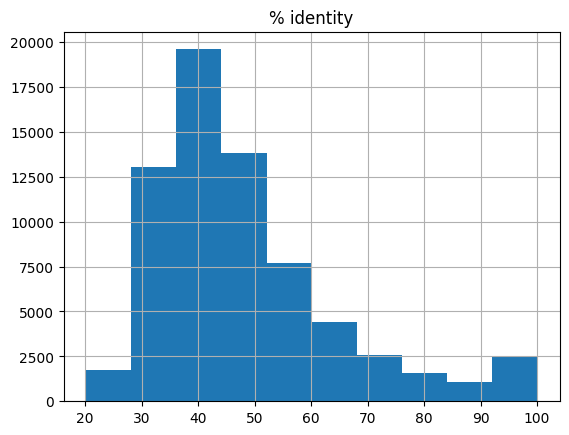

In [69]:
diamond.hist("% identity")

In [70]:
diamond

,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
Query id,,,,,,,,,,,
TRINITY_DN168237_c0_g1_i2,ALD70219.1|GH85|,99.4,804,5,0,346,2757,1,804,0.0000,1634.0
TRINITY_DN23758_c0_g1_i3,AFY17523.1|GT2|,98.3,756,13,0,2,2269,99,854,0.0000,1519.0
TRINITY_DN23758_c0_g1_i5,BAV30135.1|GT2|,97.5,729,18,0,2,2188,126,854,0.0000,1448.0
TRINITY_DN8665_c0_g1_i9,AFY17497.1|GT35|,96.7,701,23,0,107,2209,1,701,0.0000,1359.0
TRINITY_DN8665_c0_g1_i5,AFY17497.1|GT35|,96.6,701,24,0,107,2209,1,701,0.0000,1357.0
...,...,...,...,...,...,...,...,...,...,...,...
TRINITY_DN831497_c0_g1_i1,ALU76134.1|GT2|,39.4,66,38,1,34,225,2,67,0.0001,43.1
TRINITY_DN247307_c0_g1_i1,AVD70564.1|GT4|,34.8,66,43,0,24,221,777,842,0.0001,43.5
TRINITY_DN264834_c1_g1_i1,AKQ68826.1|CBM8|GH18|,36.0,75,42,2,179,394,279,350,0.0001,45.4


Text(0, 0.5, 'Mistmatches')

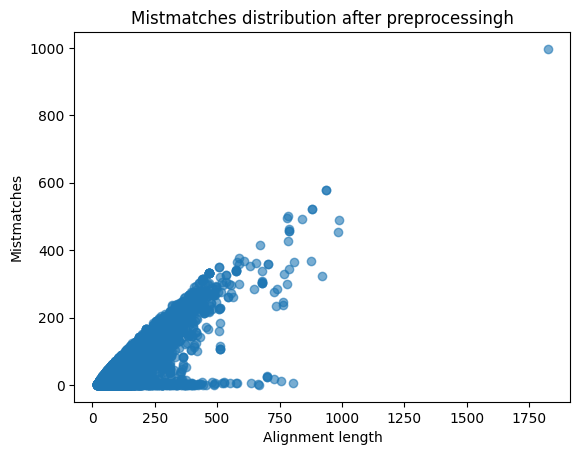

In [71]:
plt.scatter(diamond["alignment length"], diamond.mismatches, alpha=0.6)
plt.title("Mistmatches distribution after preprocessingh")
plt.xlabel("Alignment length")
plt.ylabel("Mistmatches")

## Attention !!
Please, consider the previous information to set the threshold for the e-value and the % identity.

### Merging aligned genes and count table
First, we are going to drop all columns except for ContigsID and orthologous genes header (to obtain map table). 

In [72]:
map_table = diamond[["Subject id"]]
map_table

,Subject id
Query id,
TRINITY_DN168237_c0_g1_i2,ALD70219.1|GH85|
TRINITY_DN23758_c0_g1_i3,AFY17523.1|GT2|
TRINITY_DN23758_c0_g1_i5,BAV30135.1|GT2|
TRINITY_DN8665_c0_g1_i9,AFY17497.1|GT35|
TRINITY_DN8665_c0_g1_i5,AFY17497.1|GT35|
...,...
TRINITY_DN831497_c0_g1_i1,ALU76134.1|GT2|
TRINITY_DN247307_c0_g1_i1,AVD70564.1|GT4|
TRINITY_DN264834_c1_g1_i1,AKQ68826.1|CBM8|GH18|


Now, we are going to merge both files by their column in common (ContigID and Subject id).

In [73]:
df = pd.merge(map_table, counts, left_index=True, right_index=True).reset_index(
    drop=True
)
df

,Subject id,t1.2,t1.3,X1,t2.26,t2.30,X6,t4.38,t2.25,X4,...,X3,t1.6,X2,t4.42,t2.28,t1.4,t1.1,t1.5,X5,t2.29
0,ALD70219.1|GH85|,0,12,19,0,0,0,0,5,0,...,1,0,3,0,0,0,10,0,8,1
1,AFY17523.1|GT2|,10,4,11,6,5,11,1,4,7,...,18,6,7,7,8,4,2,3,6,2
2,BAV30135.1|GT2|,4,4,12,6,7,10,1,2,12,...,10,4,5,9,2,5,2,1,10,2
3,AFY17497.1|GT35|,2,10,4,14,3,0,2,6,0,...,3,4,3,3,7,1,1,4,2,4
4,AFY17497.1|GT35|,5,11,3,10,4,3,5,4,0,...,3,3,4,3,4,1,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,AYA36999.1|CBM13|,2,0,0,2,7,4,0,4,0,...,0,3,0,4,5,6,0,3,0,7
5433,CAK44915.1|AA1|,35,53,2,64,34,2,60,43,4,...,6,11,5,51,53,10,42,12,7,59
5434,CAN82685.1|GT48|,0,20,9,1,0,0,12,4,4,...,3,0,5,0,0,0,11,0,5,0
5435,QAT16877.1|CBM50|,7,8,4,3,3,2,0,0,4,...,7,17,7,12,6,13,0,9,5,8


### Aggregate table
Now, we are going to aggregate the rows by grouping by "Subject id" (notice the difference in rows between the previous table and the following):

In [74]:
df = df.groupby("Subject id").sum(numeric_only=True)
df

,t1.2,t1.3,X1,t2.26,t2.30,X6,t4.38,t2.25,X4,t2.27,...,X3,t1.6,X2,t4.42,t2.28,t1.4,t1.1,t1.5,X5,t2.29
Subject id,,,,,,,,,,,,,,,,,,,,,
AAA32975.1|GH36|,0,0,0,2,2,125,0,0,82,0,...,2,0,0,0,0,0,0,0,139,0
AAA52561.1|GH2|3.2.1.31,1,24,11,0,0,0,12,5,0,9,...,2,1,1,0,0,0,19,0,12,0
AAB84377.1|GT8|2.4.1.186,183,4052,2696,91,8,118,1469,1070,247,2068,...,253,31,932,31,18,17,2450,7,1061,18
AAB95325.1|CBM22|CBM9|GH10|3.2.1.8,1,1,6,8,3,7,7,1,2,0,...,0,4,6,4,4,6,0,10,5,3
AAG42253.1|CBM42|GH54|3.2.1.55,0,0,0,0,0,0,0,0,0,0,...,0,36,0,0,4,34,0,36,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XP_001952340.1|GH25|,0,0,0,0,0,0,0,0,0,0,...,0,10,0,0,0,8,0,12,0,0
XP_039067.1|GT31|GT7|2.4.1.175|2.4.1.226,0,2,3,0,0,0,0,0,0,18,...,0,0,4,0,0,0,1,0,2,0
XP_331907.1|GT66|,0,0,0,0,10,0,0,0,0,0,...,0,2,0,2,4,7,0,2,0,2


## Annotating count table

First, we define some helper functions:

In [75]:
import re
import doctest


def extract_CAZyDB_id(x: str) -> list[str]:
    """
    >>> extract_CAZyDB_id('XP_503149.1|GH18')
    ['GH18']
    >>> extract_CAZyDB_id('AAA52077.1|CBM8|3.2.1.4')
    ['CBM8']
    >>> extract_CAZyDB_id('AAA52077.1|CBM8|3.2.1.4|GH18')
    ['CBM8', 'GH18']
    """
    return [elm for elm in x.split("|")[1:] if not re.match(r"^\d", elm)]


def get_annotation_from_CAZyDB_id(x: str) -> str:
    """
    >>> get_annotation_from_CAZyDB_id('GH31')
    'Glycoside Hydrolases'
    >>> get_annotation_from_CAZyDB_id('GT75')
    'GlycosylTransferases'
    >>> get_annotation_from_CAZyDB_id('AA5')
    'Auxiliary Activities'
    >>> get_annotation_from_CAZyDB_id('QAT16263.1')
    ''
    """
    symbols = {
        "GH": "Glycoside Hydrolases",
        "GT": "GlycosylTransferases",
        "PL": "Polysaccharide Lyases",
        "CE": "Carbohydrate Esterases",
        "AA": "Auxiliary Activities",
        "CBM": "Carbohydrate-Binding Modules",
    }
    for k in symbols.keys():
        regex = "^" + k
        if re.match(regex, x):
            return symbols[k]
    return ""


# Run tests
doctest.testmod()

TestResults(failed=0, attempted=7)

In [76]:
df["CAZyDB_id"] = [[y for y in extract_CAZyDB_id(x) if y] for x in df.index]
df

,t1.2,t1.3,X1,t2.26,t2.30,X6,t4.38,t2.25,X4,t2.27,...,t1.6,X2,t4.42,t2.28,t1.4,t1.1,t1.5,X5,t2.29,CAZyDB_id
Subject id,,,,,,,,,,,,,,,,,,,,,
AAA32975.1|GH36|,0,0,0,2,2,125,0,0,82,0,...,0,0,0,0,0,0,0,139,0,[GH36]
AAA52561.1|GH2|3.2.1.31,1,24,11,0,0,0,12,5,0,9,...,1,1,0,0,0,19,0,12,0,[GH2]
AAB84377.1|GT8|2.4.1.186,183,4052,2696,91,8,118,1469,1070,247,2068,...,31,932,31,18,17,2450,7,1061,18,[GT8]
AAB95325.1|CBM22|CBM9|GH10|3.2.1.8,1,1,6,8,3,7,7,1,2,0,...,4,6,4,4,6,0,10,5,3,"[CBM22, CBM9, GH10]"
AAG42253.1|CBM42|GH54|3.2.1.55,0,0,0,0,0,0,0,0,0,0,...,36,0,0,4,34,0,36,0,6,"[CBM42, GH54]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XP_001952340.1|GH25|,0,0,0,0,0,0,0,0,0,0,...,10,0,0,0,8,0,12,0,0,[GH25]
XP_039067.1|GT31|GT7|2.4.1.175|2.4.1.226,0,2,3,0,0,0,0,0,0,18,...,0,4,0,0,0,1,0,2,0,"[GT31, GT7]"
XP_331907.1|GT66|,0,0,0,0,10,0,0,0,0,0,...,2,0,2,4,7,0,2,0,2,[GT66]


The newest version of CAZy has enzymes with more than one function. Let's se how many:

In [77]:
sum([l > 1 for l in df.CAZyDB_id.map(len)]) / len(df.CAZyDB_id)

0.09163059163059163

Roughly, 10% of annotated rows has 'multi-level' annotations. We are going to produce two tables: one with one entry per enzyme and another with one entry per 'function'. 

In [78]:
df = df.explode("CAZyDB_id")
df

,t1.2,t1.3,X1,t2.26,t2.30,X6,t4.38,t2.25,X4,t2.27,...,t1.6,X2,t4.42,t2.28,t1.4,t1.1,t1.5,X5,t2.29,CAZyDB_id
Subject id,,,,,,,,,,,,,,,,,,,,,
AAA32975.1|GH36|,0,0,0,2,2,125,0,0,82,0,...,0,0,0,0,0,0,0,139,0,GH36
AAA52561.1|GH2|3.2.1.31,1,24,11,0,0,0,12,5,0,9,...,1,1,0,0,0,19,0,12,0,GH2
AAB84377.1|GT8|2.4.1.186,183,4052,2696,91,8,118,1469,1070,247,2068,...,31,932,31,18,17,2450,7,1061,18,GT8
AAB95325.1|CBM22|CBM9|GH10|3.2.1.8,1,1,6,8,3,7,7,1,2,0,...,4,6,4,4,6,0,10,5,3,CBM22
AAB95325.1|CBM22|CBM9|GH10|3.2.1.8,1,1,6,8,3,7,7,1,2,0,...,4,6,4,4,6,0,10,5,3,CBM9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XP_039067.1|GT31|GT7|2.4.1.175|2.4.1.226,0,2,3,0,0,0,0,0,0,18,...,0,4,0,0,0,1,0,2,0,GT31
XP_039067.1|GT31|GT7|2.4.1.175|2.4.1.226,0,2,3,0,0,0,0,0,0,18,...,0,4,0,0,0,1,0,2,0,GT7
XP_331907.1|GT66|,0,0,0,0,10,0,0,0,0,0,...,2,0,2,4,7,0,2,0,2,GT66


Now we can annotate the count table:

In [79]:
df["Level1"] = [get_annotation_from_CAZyDB_id(elm) for elm in df.CAZyDB_id]
df

,t1.2,t1.3,X1,t2.26,t2.30,X6,t4.38,t2.25,X4,t2.27,...,X2,t4.42,t2.28,t1.4,t1.1,t1.5,X5,t2.29,CAZyDB_id,Level1
Subject id,,,,,,,,,,,,,,,,,,,,,
AAA32975.1|GH36|,0,0,0,2,2,125,0,0,82,0,...,0,0,0,0,0,0,139,0,GH36,Glycoside Hydrolases
AAA52561.1|GH2|3.2.1.31,1,24,11,0,0,0,12,5,0,9,...,1,0,0,0,19,0,12,0,GH2,Glycoside Hydrolases
AAB84377.1|GT8|2.4.1.186,183,4052,2696,91,8,118,1469,1070,247,2068,...,932,31,18,17,2450,7,1061,18,GT8,GlycosylTransferases
AAB95325.1|CBM22|CBM9|GH10|3.2.1.8,1,1,6,8,3,7,7,1,2,0,...,6,4,4,6,0,10,5,3,CBM22,Carbohydrate-Binding Modules
AAB95325.1|CBM22|CBM9|GH10|3.2.1.8,1,1,6,8,3,7,7,1,2,0,...,6,4,4,6,0,10,5,3,CBM9,Carbohydrate-Binding Modules
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XP_039067.1|GT31|GT7|2.4.1.175|2.4.1.226,0,2,3,0,0,0,0,0,0,18,...,4,0,0,0,1,0,2,0,GT31,GlycosylTransferases
XP_039067.1|GT31|GT7|2.4.1.175|2.4.1.226,0,2,3,0,0,0,0,0,0,18,...,4,0,0,0,1,0,2,0,GT7,GlycosylTransferases
XP_331907.1|GT66|,0,0,0,0,10,0,0,0,0,0,...,0,2,4,7,0,2,0,2,GT66,GlycosylTransferases


And now we add descriptions: 

In [80]:
# Force the tsv in descriptions_tsv to have two columns
descriptions = pd.read_csv(
    descriptions_tsv, sep="\t", comment="#", header=None, names=["CAZyDB_id", "Level2"]
)
descriptions

,CAZyDB_id,Level2
0,AA0,
1,AA10,AA10 (formerly CBM33) proteins are copper-de...
2,AA11,AA11 proteins are copper-dependent lytic pol...
3,AA12,The pyrroloquinoline quinone-dependent oxido...
4,AA13,AA13 proteins are copper-dependent lytic pol...
...,...,...
441,PL5,"alginate lyase (EC 4.2.2.3); endo-beta-1,4-g..."
442,PL6,alginate lyase (EC 4.2.2.3); chondroitinase ...
443,PL7,poly(beta-mannuronate) lyase / M-specific al...
444,PL8,hyaluronate lyase (EC 4.2.2.1); chondroitin ...


In [81]:
# Rename index to ContigID column and drop index
df = df.reset_index().rename(columns={"index": "ContigID"})
# Add the description to the dataframe
df = pd.merge(df, descriptions, on="CAZyDB_id", how="left")

In [82]:
df

,Subject id,t1.2,t1.3,X1,t2.26,t2.30,X6,t4.38,t2.25,X4,...,t4.42,t2.28,t1.4,t1.1,t1.5,X5,t2.29,CAZyDB_id,Level1,Level2
0,AAA32975.1|GH36|,0,0,0,2,2,125,0,0,82,...,0,0,0,0,0,139,0,GH36,Glycoside Hydrolases,alpha-galactosidase (EC 3.2.1.22); alpha-N-a...
1,AAA52561.1|GH2|3.2.1.31,1,24,11,0,0,0,12,5,0,...,0,0,0,19,0,12,0,GH2,Glycoside Hydrolases,beta-galactosidase (EC 3.2.1.23) ; beta-mann...
2,AAB84377.1|GT8|2.4.1.186,183,4052,2696,91,8,118,1469,1070,247,...,31,18,17,2450,7,1061,18,GT8,GlycosylTransferases,"lipopolysaccharide alpha-1,3-galactosyltrans..."
3,AAB95325.1|CBM22|CBM9|GH10|3.2.1.8,1,1,6,8,3,7,7,1,2,...,4,4,6,0,10,5,3,CBM22,Carbohydrate-Binding Modules,A xylan binding function has been demonstrat...
4,AAB95325.1|CBM22|CBM9|GH10|3.2.1.8,1,1,6,8,3,7,7,1,2,...,4,4,6,0,10,5,3,CBM9,Carbohydrate-Binding Modules,Modules of approx. 170 residues found so far...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,XP_039067.1|GT31|GT7|2.4.1.175|2.4.1.226,0,2,3,0,0,0,0,0,0,...,0,0,0,1,0,2,0,GT31,GlycosylTransferases,"N-acetyllactosaminide beta-1,3-N-acetylgluco..."
1529,XP_039067.1|GT31|GT7|2.4.1.175|2.4.1.226,0,2,3,0,0,0,0,0,0,...,0,0,0,1,0,2,0,GT7,GlycosylTransferases,lactose synthase (EC 2.4.1.22); beta-N-acety...
1530,XP_331907.1|GT66|,0,0,0,0,10,0,0,0,0,...,2,4,7,0,2,0,2,GT66,GlycosylTransferases,dolichyl-diphosphooligosaccharide-protein gl...
1531,XP_367690.1|GH20|,3,2,0,0,0,0,0,0,0,...,0,2,5,0,6,0,3,GH20,Glycoside Hydrolases,beta-hexosaminidase (EC 3.2.1.52); lacto-N-b...


The following table has one entry per annotation. 

For example, there will be 3 entries for 'AAB95325.1|CBM22|CBM9|GH10|3.2.1.8'. 

In [83]:
df.to_csv("CAZy_counttable_annotated_multilevel.tsv", sep="\t", index=False)

The next table is going to have one entry per enzyme and different function. 

For example, there will be 2 entries for 'AAB95325.1|CBM22|CBM9|GH10|3.2.1.8' (one for the carbon binding function and another for the GH function)

In [84]:
df = df.sample(frac=1).drop_duplicates(subset=['Subject id', 'Level1'])
df.to_csv("CAZy_counttable_annotated_multifunction.tsv", sep="\t", index=False)

Finally, the last table will have one entry per enzyme.

In [85]:
df = df.sample(frac=1).drop_duplicates(subset=['Subject id'])
df.to_csv("CAZy_counttable_annotated_collapsed.tsv", sep="\t", index=False)